In [69]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras import optimizers
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K


rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

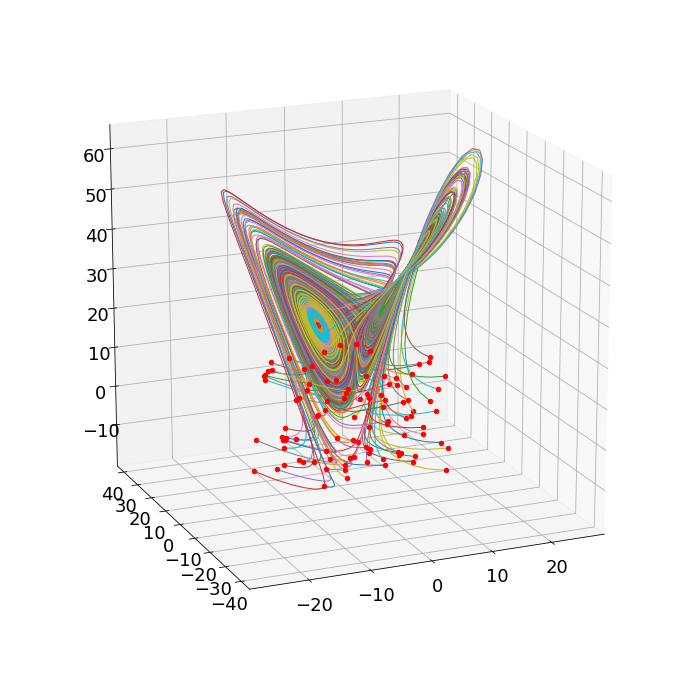

In [66]:
## Simulate the Lorenz System

dt = 0.01
T = 8
t = np.arange(0,T+dt,dt)
beta = 8/3
sigma = 10
rho = 28


nn_input = np.zeros((100*(len(t)-1),3))
nn_output = np.zeros_like(nn_input)

fig,ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})


def lorenz_deriv(x_y_z, t0, sigma=sigma, beta=beta, rho=rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

np.random.seed(123)
x0 = -15 + 30 * np.random.random((100, 3))

x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t)
                  for x0_j in x0])

for j in range(100):
    nn_input[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,:-1,:]
    nn_output[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,1:,:]
    x, y, z = x_t[j,:,:].T
    ax.plot(x, y, z,linewidth=1)
    ax.scatter(x0[j,0],x0[j,1],x0[j,2],color='r')
             
ax.view_init(18, -113)
plt.show()

In [75]:
## Neural Net

# Define activation functions
def logsig(x):
    return K.variable(np.divide(1,(1+np.exp(-K.eval(x)))))

def radbas(x):
    return K.variable(np.exp(-np.power(K.eval(x),2)))

def purelin(x):
    return x


#create model
model = Sequential()

#add model layers
model.add(Dense(10, activation=logsig))
model.add(Dense(10, activation=radbas))
model.add(Dense(10, activation=purelin))




sgd_optimizer = optimizers.SGD(momentum=0.9)
model.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy')
model.fit(nn_input, nn_output, epochs=30)

InvalidArgumentError: You must feed a value for placeholder tensor 'sequential_4_input' with dtype float and shape [?,3]
	 [[node sequential_4_input (defined at C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\keras\backend\tensorflow_backend.py:517) ]]
	 [[node dense_10/BiasAdd (defined at C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\keras\backend\tensorflow_backend.py:4091) ]]

Caused by op 'sequential_4_input', defined at:
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel\kernelapp.py", line 505, in start
    self.io_loop.start()
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\tornado\platform\asyncio.py", line 148, in start
    self.asyncio_loop.run_forever()
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\asyncio\base_events.py", line 438, in run_forever
    self._run_once()
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\asyncio\base_events.py", line 1451, in _run_once
    handle._run()
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\asyncio\events.py", line 145, in _run
    self._callback(*self._args)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel\kernelbase.py", line 357, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel\kernelbase.py", line 267, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel\kernelbase.py", line 534, in execute_request
    user_expressions, allow_stdin,
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel\ipkernel.py", line 294, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\IPython\core\interactiveshell.py", line 2854, in run_cell
    raw_cell, store_history, silent, shell_futures)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\IPython\core\interactiveshell.py", line 2880, in _run_cell
    return runner(coro)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\IPython\core\interactiveshell.py", line 3057, in run_cell_async
    interactivity=interactivity, compiler=compiler, result=result)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\IPython\core\interactiveshell.py", line 3248, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\IPython\core\interactiveshell.py", line 3325, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-75-cea835af5f33>", line 27, in <module>
    model.fit(nn_input, nn_output, epochs=30)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\keras\engine\training.py", line 952, in fit
    batch_size=batch_size)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\keras\engine\training.py", line 677, in _standardize_user_data
    self._set_inputs(x)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\keras\engine\training.py", line 589, in _set_inputs
    self.build(input_shape=(None,) + inputs.shape[1:])
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\keras\engine\sequential.py", line 218, in build
    name=self.name + '_input')
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\keras\engine\input_layer.py", line 178, in Input
    input_tensor=tensor)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\keras\legacy\interfaces.py", line 91, in wrapper
    return func(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\keras\engine\input_layer.py", line 87, in __init__
    name=self.name)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\keras\backend\tensorflow_backend.py", line 517, in placeholder
    x = tf.placeholder(dtype, shape=shape, name=name)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\tensorflow\python\ops\array_ops.py", line 2077, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 5791, in placeholder
    "Placeholder", dtype=dtype, shape=shape, name=name)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 788, in _apply_op_helper
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\tensorflow\python\util\deprecation.py", line 507, in new_func
    return func(*args, **kwargs)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\tensorflow\python\framework\ops.py", line 3300, in create_op
    op_def=op_def)
  File "C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\tensorflow\python\framework\ops.py", line 1801, in __init__
    self._traceback = tf_stack.extract_stack()

InvalidArgumentError (see above for traceback): You must feed a value for placeholder tensor 'sequential_4_input' with dtype float and shape [?,3]
	 [[node sequential_4_input (defined at C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\keras\backend\tensorflow_backend.py:517) ]]
	 [[node dense_10/BiasAdd (defined at C:\ProgramData\Anaconda3\envs\tensorflow_gpuenv\lib\site-packages\keras\backend\tensorflow_backend.py:4091) ]]


In [76]:
nn_input.shape

(80000, 3)